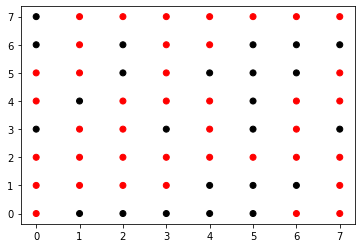

In [22]:
import matplotlib.pyplot as plt
import numpy as np

def plot_grid(narr):
    '''Plots 2d lattice with vertices colored in black and red according to given mask.
    Vertice is colored black if narr[i, j] == True and red otherwise.
    
    Parameters
    ----------
    narr : 2d boolean ndarray
        Mask for vertices colors
    '''

    if narr.dtype != 'bool':
        raise ValueError('narr should be a boolean ndarray')
    colors = np.empty(narr.shape, dtype='U5')
    colors[:] = 'red'
    colors[narr] = 'black'
    x, y = np.indices((narr.shape))
    plt.scatter(x, y, c=colors.ravel())
    plt.show()

size = 8
narr = np.random.choice([0, 1], size=size**2).reshape((size, size)).astype('bool')

plot_grid(narr)

In [23]:
from scipy import stats
def g_test(x, start=0.1, end=0.5):
    return stats.ttest_ind(x[:int(len(x) * start)], x[-int(len(x) * end):], equal_var=False)

Будем действовать почти как с депутатом, сначала все вершины имеют 0, а потом мы равновероятно переходим к одной из соседних конфигураций: то есть меняется всего одна клетка, но конечно к допустимой конфигурации.

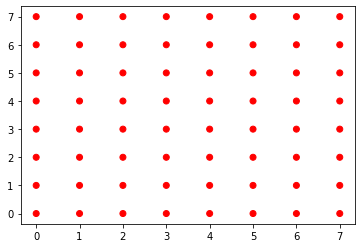

In [24]:
size=8
current=np.zeros(size**2).reshape((size,size)).astype('bool')
plot_grid(current)

Функция, которое меняет состояние на соседнее

In [58]:
def change_current(current):
    possible_next=[];#массив новых возможных состояний
    for i in range(8):
        for j in range(8):
            if ((i == 0 or not current[i - 1, j]) and (j == 0 or not current[i, j - 1]) and (i == current.shape[0] - 1 or not current[i + 1, j]) and (j == current.shape[1] - 1 or not current[i, j + 1])) or (current[i,j]):
                possible_next.append((i,j))
    Length=len(possible_next)
    if (Length==0):
        return current
    change=possible_next[np.random.randint(0,Length)]
    current[change[0],change[1]]=not current[change[0],change[1]]
    return current

Теперь сделаем много шагов, 100 000 и посчитаем среднее количество единиц

In [68]:
Numbers=np.zeros(100000)
for i in range(100000):
    Numbers[i]=current.sum()
    current=(change_current(current))
#plot_grid(current)
print(np.mean(Numbers))

15.2931


Построим количество вершин на каждом шаге и сделаем вывод о стационарности. А также проверим критерий стьюдента, таким образом численно проверив стационарность.

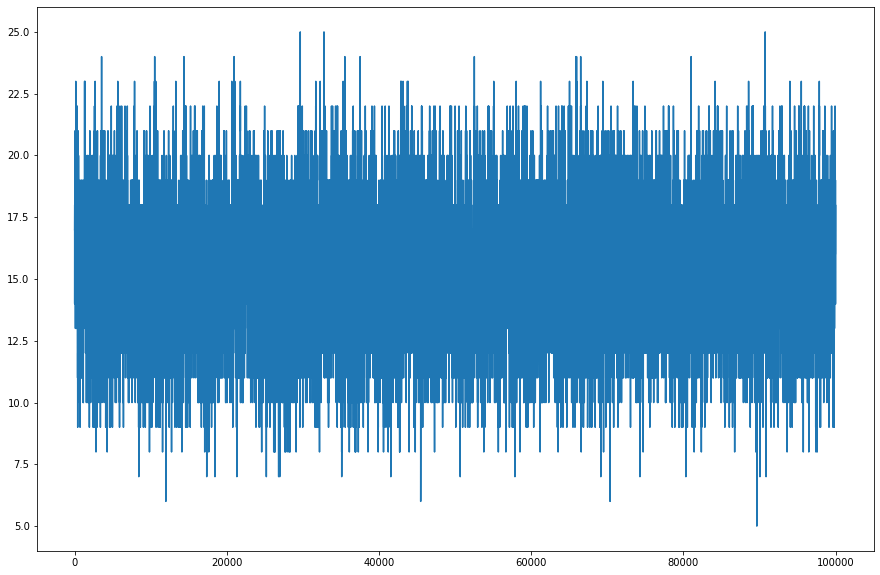

In [72]:
plt.figure(figsize=(15,10))
plt.plot(Numbers)

In [73]:
g_test(Numbers)

Ttest_indResult(statistic=-2.4619598002068592, pvalue=0.013829805151917266)

p-значение очень маленькое, то есть гипотеза стационарности не отвергается, кроме того стационарность видна по графику.

Осталось построить плотность:

<BarContainer object of 64 artists>

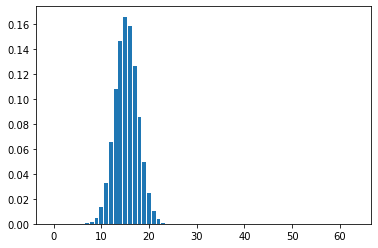

In [93]:
a=np.arange(64)
b=np.zeros(64)
for i in range(len(Numbers)):
    c=int(Numbers[i])
    b[c]=b[c]+1;
for i in range(64):
    b[i]=b[i]/len(Numbers)
plt.bar(a,b)